In [1]:
import numpy as np
from scipy.integrate import fixed_quad
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import quantecon as qe
from numba import njit

## Solve linear equation system

$$
\underset{A}{\underbrace{\left[\begin{array}{ccc}
1 & 2 & 3\\
2 & 1 & 0\\
4 & 2 & 1
\end{array}\right]}}x=\underset{b}{\underbrace{\left[\begin{array}{c}
1\\
0\\
3
\end{array}\right]}}
$$

In [2]:
A = np.array([[1, 2, 3],
              [2, 1, 0],
              [4, 2, 1]])

b = np.array([[1, 0, 3]]).T

$$
x=A^{-1}b
$$

In [3]:
# np.linalg.inv?

In [4]:
x = np.linalg.inv(A) @ b

x

array([[ 2.66666667],
       [-5.33333333],
       [ 3.        ]])

In [5]:
A @ x - b

array([[0.],
       [0.],
       [0.]])

In [6]:
# np.linalg.solve?

In [7]:
np.linalg.solve(A, b)

array([[ 2.66666667],
       [-5.33333333],
       [ 3.        ]])

In [8]:
qe.tic()
np.linalg.inv(A) @ b
qe.toc()

TOC: Elapsed: 0:00:0.00


0.00034332275390625

In [9]:
qe.tic()
np.linalg.solve(A, b)
qe.toc()

TOC: Elapsed: 0:00:0.00


0.00012183189392089844

In [10]:
np.random.seed(1234)

N = 1000
A_large = np.random.random((N, N))
b_large = np.random.random((N, 1))

A_large.shape, b_large.shape

((1000, 1000), (1000, 1))

In [11]:
np.linalg.matrix_rank(A_large)

1000

In [12]:
np.max(np.abs(np.linalg.inv(A_large) @ b_large - np.linalg.solve(A_large, b_large)))

1.7304907506954237e-13

In [13]:
qe.tic()
np.linalg.inv(A_large) @ b_large
qe.toc()

TOC: Elapsed: 0:00:0.05


0.05348396301269531

In [14]:
qe.tic()
np.linalg.solve(A_large, b_large)
qe.toc()

TOC: Elapsed: 0:00:0.05


0.05081987380981445

In [15]:
@njit
def linear_solver(A, b):

    return np.linalg.inv(A_large) @ b_large

In [16]:
qe.tic()
linear_solver(A_large, b_large);
qe.toc()

TOC: Elapsed: 0:00:1.15


1.1543972492218018

In [17]:
qe.tic()
linear_solver(A_large, b_large);
qe.toc()

TOC: Elapsed: 0:00:0.09


0.09473347663879395

## Solve nonlinear equation system

## Optimization

## Quadrature

To compute

$$
\int_{-\infty}^{\infty} f\left(x\right) dx
$$

where $x\sim\left(0, 1\right)$

It can be approximated by

$$
\sum_{i=1}^{n}\frac{\omega_{i}}{\sqrt{\pi}}f\left(\mu+\sqrt{2}\sigma\zeta_{i}\right)
$$

In [18]:
μ = 0
σ = 1

In [19]:
@njit
def f_integrad(x, λ0, λ1, λ2):

    return λ0 + λ1 * x + λ2 * x**2

In [20]:
λ0, λ1, λ2 = 0.5, 0.2, 0.3

In [21]:
# Gaussian-Hermite quadrature nodes and weights for order 5
ζ_nodes = np.array([0,
                    0.958572464613819,
                    -0.958572464613819,
                    0.202018287045609,
                    -0.202018287045609])

ω_weights = np.array([0.945308720482942,
                      0.393619323152241,
                      0.393619323152241,
                      0.0199532420590459,
                      0.0199532420590459])

In [22]:
np.sum(ω_weights / np.sqrt(np.pi) * f_integrad(μ + np.sqrt(2) * σ * ζ_nodes, λ0, λ1, λ2))

0.7454196465070009

In [23]:
# Gaussian-Hermite quadrature nodes and weights for order 10
ζ_nodes = np.array([0.342901327223704609,
                    -0.342901327223704609,
                    1.03661082978951365,
                    -1.03661082978951365,
                    1.75668364929988177,
                    -1.75668364929988177,
                    2.53273167423278980,
                    -2.53273167423278980,
                    3.43615911883773760,
                    -3.43615911883773760])

ω_weights = np.array([0.610862633735325799,
                      0.610862633735325799,
                      0.240138611082314686,
                      0.240138611082314686,
                      0.0338743944554810631,
                      0.0338743944554810631,
                      0.00134364574678123269,
                      0.00134364574678123269,
                      0.764043285523262063e-5,
                      0.764043285523262063e-5])

In [24]:
np.sum(ω_weights / np.sqrt(np.pi) * f_integrad(μ + np.sqrt(2) * σ * ζ_nodes, λ0, λ1, λ2))

0.8000000000000002

## Simulation based integration

In [34]:
x_normal = np.random.normal(size=10000)

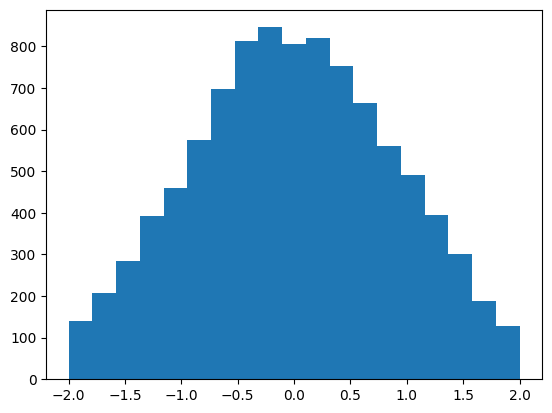

In [35]:
plt.hist(x_normal, bins=np.linspace(-2, 2, 20));

In [36]:
f_integrad(x_normal, λ0, λ1, λ2).mean()

0.8007853140118009

## Cubic spline interpolation

In [28]:
x = np.arange(10)
y = np.sin(x)

In [29]:
cs = CubicSpline(x, y)

cs

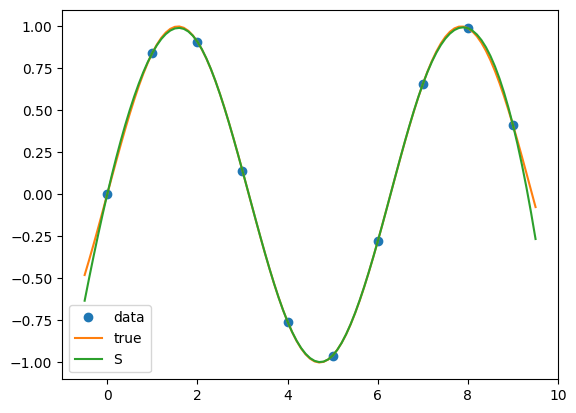

In [37]:
fig = plt.figure()

xs = np.arange(-0.5, 9.6, 0.1)

plt.plot(x, y, 'o', label='data')
plt.plot(xs, np.sin(xs), label='true')
plt.plot(xs, cs(xs), label="S")

plt.legend()